In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from matplotlib.cm import get_cmap

warnings.filterwarnings("ignore")

In [7]:
url = 'https://drive.google.com/file/d/135r0zppiZruDktBfu2cYgeBZ0pe5FTW7/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
Diabetes = pd.read_csv(path)


In [8]:
Diabetes.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df=Diabetes.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
#Change Data type age: float to Integer
df.astype({"age":int})

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80,0,0,No Info,27.32,6.2,90,0
99996,Female,2,0,0,No Info,17.37,6.5,100,0
99997,Male,66,0,0,former,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


In [11]:
#Check for empty values.
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
#Check for duplications values and drop them
df.duplicated().value_counts()
print("Number of Duplicated Values = ",df.duplicated().sum())

df.drop_duplicates().count()

Number of Duplicated Values =  3854


gender                 96146
age                    96146
hypertension           96146
heart_disease          96146
smoking_history        96146
bmi                    96146
HbA1c_level            96146
blood_glucose_level    96146
diabetes               96146
dtype: int64

In [13]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [14]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [15]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Distribution of diabeties in dataset')

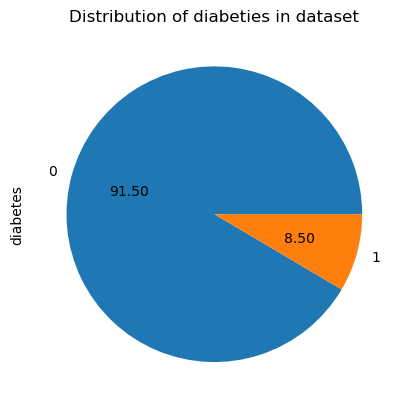

In [16]:
# Percentage of Non_diabetic vs Diabetic patients
df['diabetes'].value_counts().plot(kind='pie',autopct='%0.2f')
plt.title("Distribution of diabeties in dataset")

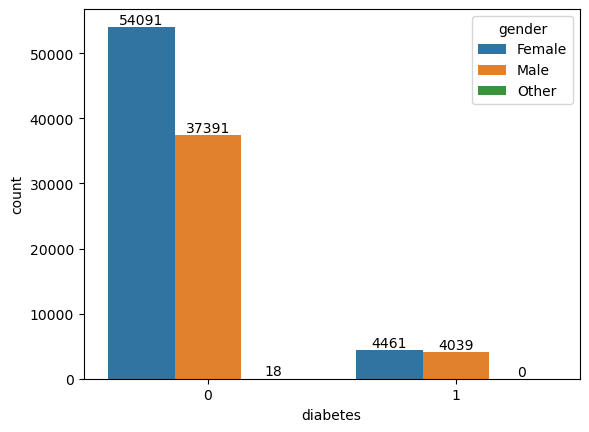

In [17]:
#Gender vs Diabetes
gen=sns.countplot(x='diabetes',data=df,hue='gender')

for bars in gen.containers:
    gen.bar_label(bars)

<Axes: >

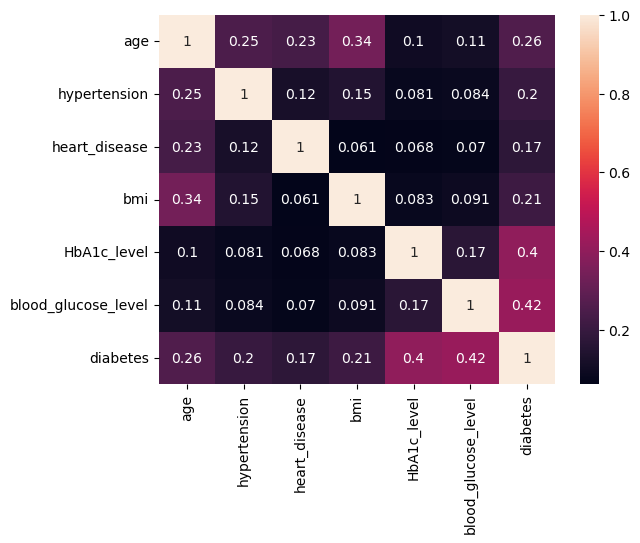

In [18]:
#detecting correlation between diabeted and key features
sns.heatmap(df.corr(),annot=True)

In [19]:
#mapping character values to numerical
df['gender_num']=df['gender'].map({'Female':0,'Male':1,'Other':2})
df['smoking_history_num']=df['smoking_history'].map({'No Info':-1,'never':0,
                                                     'former':1,'current':2,
                                                     'not current':3,'ever':4})
df=df.drop('smoking_history',axis=1)
df=df.drop('gender',axis=1)

In [ ]:
#Re-check correlation
#sns.heatmap(df.corr(),annot=True)

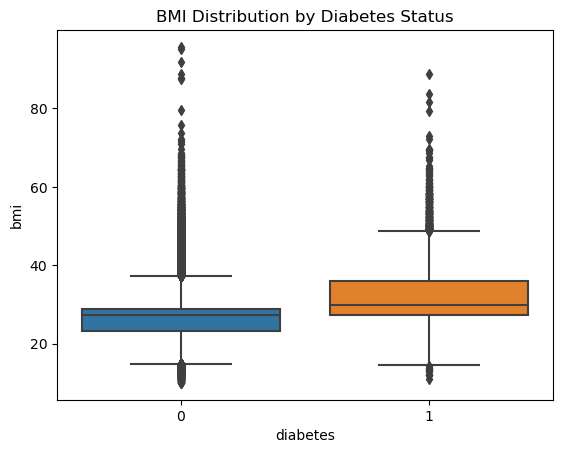

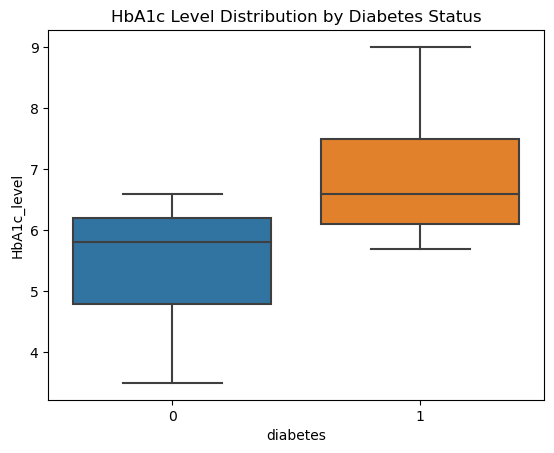

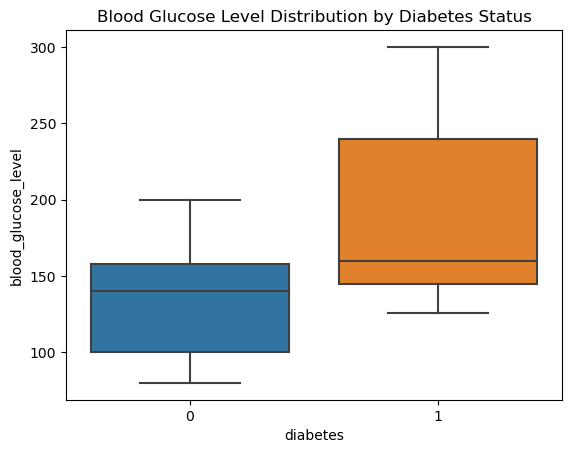

In [20]:
#Address skewed variables (features) by transforming

sns.boxplot(x="diabetes", y="bmi", data=df)
plt.title("BMI Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="HbA1c_level", data=df)
plt.title("HbA1c Level Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="blood_glucose_level", data=df)
plt.title("Blood Glucose Level Distribution by Diabetes Status")
plt.show()

In [21]:
#Check outliers and remove them
#Q1=df["bmi"].quantile(0.25)
#Q3=df["bmi"].quantile(0.75)
#print(Q1,Q3)
#IQR = Q3 - Q1
#print(IQR)
#lowerlimit = Q1 - 1.5*IQR
#upperlimit = Q3 + 1.5*IQR
#print(lowerlimit, upperlimit)
#df1 = df[(df['bmi']<lowerlimit)|(df['bmi']>upperlimit)]
#print(df1)

In [23]:
df.skew()

age                   -0.051979
hypertension           3.231296
heart_disease          4.733872
bmi                    1.043836
HbA1c_level           -0.066854
blood_glucose_level    0.821655
diabetes               2.976217
gender_num             0.350954
smoking_history_num    1.136437
dtype: float64

In [24]:
#sqr transformation
#df1["smoking_history_num"]=np.sqrt(df1["smoking_history_num"])
#df1["hypertension"]=np.sqrt(df1["hypertension"])
df["bmi"]=np.sqrt(df["bmi"])
#df1["heart_disease"]=np.sqrt(df1["heart_disease"])

In [25]:
df.skew()

age                   -0.051979
hypertension           3.231296
heart_disease          4.733872
bmi                    0.416082
HbA1c_level           -0.066854
blood_glucose_level    0.821655
diabetes               2.976217
gender_num             0.350954
smoking_history_num    1.136437
dtype: float64

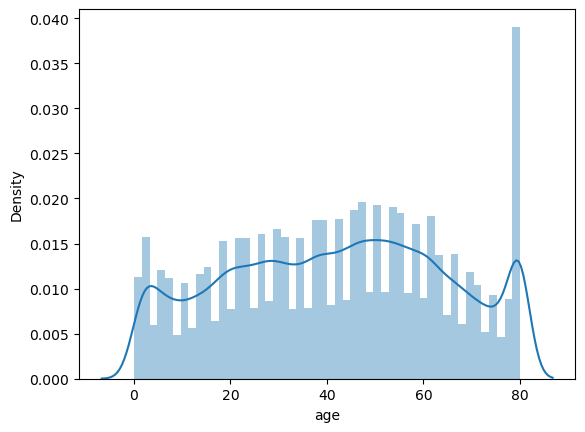

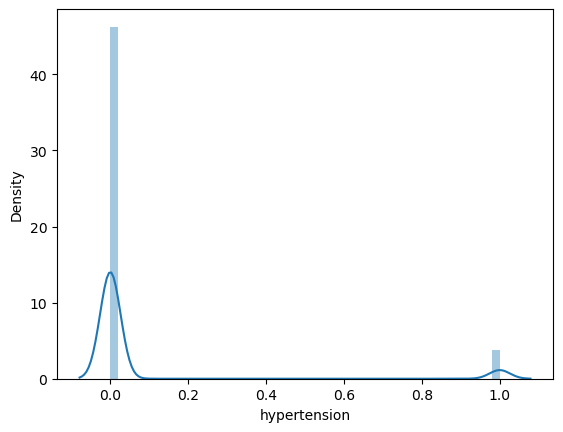

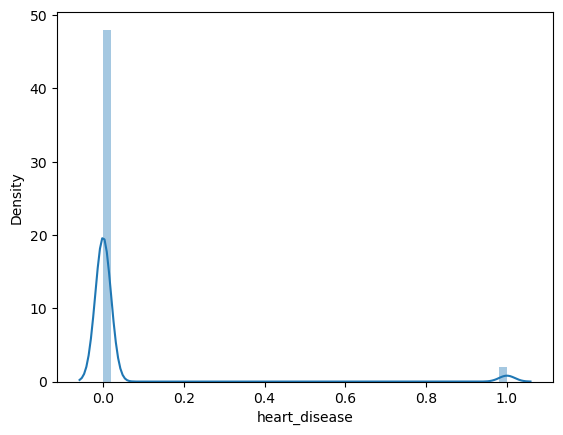

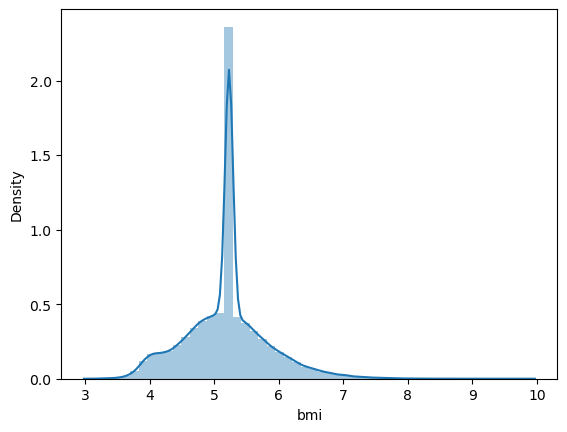

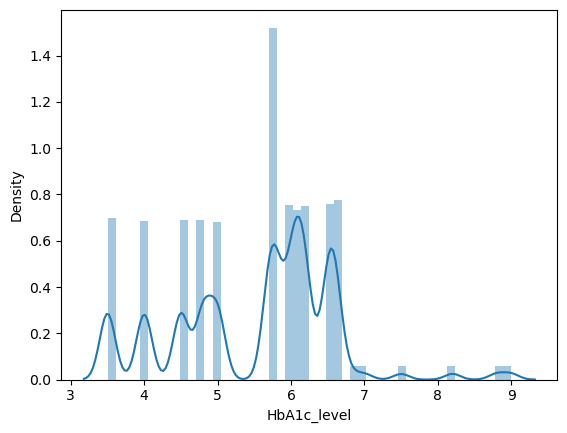

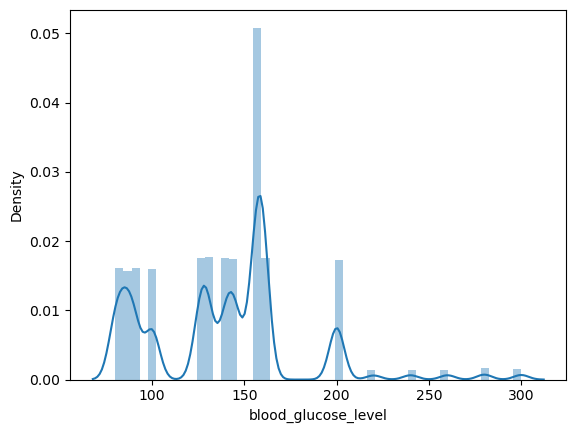

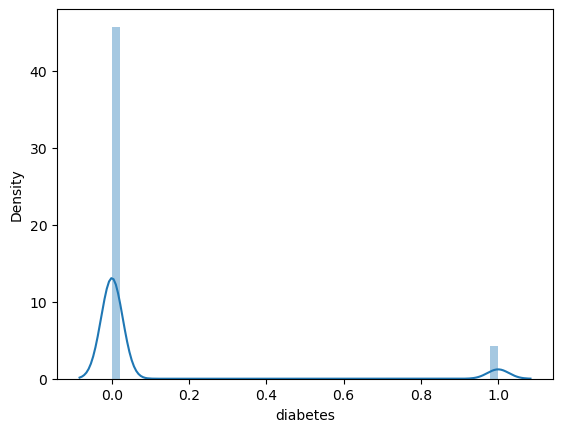

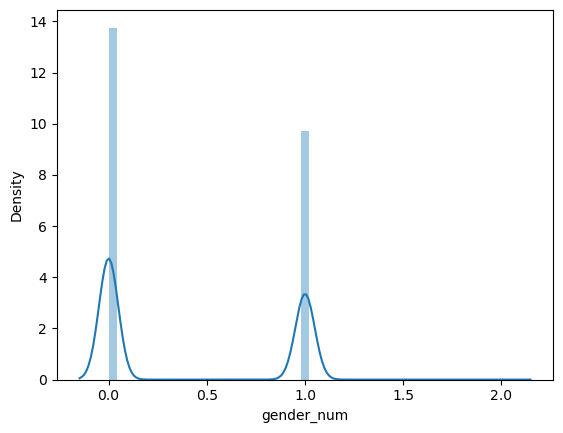

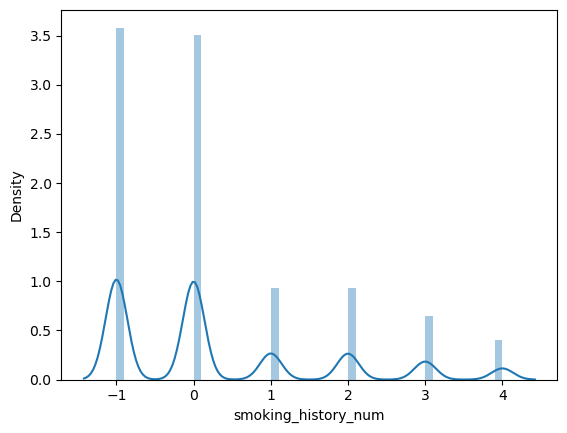

In [26]:
for i in df.columns:
  sns.distplot(df[i], kde=True)
  plt.show()
  print()

In [27]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_num,smoking_history_num
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,41.885856,0.07485,0.039420,5.189993,5.527507,138.058060,0.085000,0.414660,0.27465
std,22.516840,0.26315,0.194593,0.620280,1.070672,40.708136,0.278883,0.493031,1.40306
min,0.080000,0.00000,0.000000,3.163858,3.500000,80.000000,0.000000,0.000000,-1.00000
25%,24.000000,0.00000,0.000000,4.861070,4.800000,100.000000,0.000000,0.000000,-1.00000
50%,43.000000,0.00000,0.000000,5.226854,5.800000,140.000000,0.000000,0.000000,0.00000
75%,60.000000,0.00000,0.000000,5.438750,6.200000,159.000000,0.000000,1.000000,1.00000
max,80.000000,1.00000,1.000000,9.782127,9.000000,300.000000,1.000000,2.000000,4.00000


In [29]:
X=df.drop(['diabetes'],axis=1)
y=df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=123)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(75000, 8) (75000,)
(25000, 8) (25000,)


In [30]:


# determine the columns that will need to go to the numerical pipeline
# also determine those columns that need to go to the categorical pipeline
#X_num = X.select_dtypes(include=['int64', 'float64']).copy() #columns
#X_cat = X.select_dtypes(include=['object']).copy() #columns

In [31]:
#Train my Model 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
num_pipe = make_pipeline(SimpleImputer())
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [32]:
from sklearn.compose import ColumnTransformer
full_processor = ColumnTransformer(transformers=[
                        ("numeric_pipe", num_pipe, X_num),
                       
                       ])
full_processor

ColumnTransformer(transformers=[('numeric_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                         age  hypertension  heart_disease       bmi  HbA1c_level  \
0      80.0             0              1  5.018964          6.6   
1      54.0             0              0  5.226854          6.6   
2      28.0             0              0  5.226854          5.7   
3      36.0             0              0  4.842520          5.0   
4      76.0             1              1  4.487761          4.8   
...     ...           ...            ...       ...          ...   
99995  80.0             0              0  5.226854          6.2   
99996   2.0             0              0  4.167733          6.5   
99997  66.0             0              0  5.275415          5.7   
99998  24.0             0              0  5.951470          4.0   
99999  57.0             0              0  4.736032          6.6   

       blood_glucose_level  gender_num  smoking_history_num  
0                      140           0                    0  
1                       80           0                   -1  
2                      158           1                    0  
3                      155           0                    2  
4                      155           1                    2  
...                    ...         ...                  ...  
99995                   90           0                   -1  
99996                  100           0                   -1  
99997                  155           1                    1  
99998                  100           0                    0  
99999                   90           0                    2  

[100000 rows x 8 columns])])

In [40]:
#Scaling thee values between the range[-1,1]
scaler = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,15))])

In [41]:
#scaler = ColumnTransformer([
    #('scale',StandardScaler())])

In [45]:
#1.model training
#dtc= DecisionTreeClassifier()
#dtc= DecisionTreeClassifier()
#lr=LogisticRegression()
lr=LogisticRegression(solver='newton-cg',penalty='l2', C=0.001, max_iter=1000)

In [46]:
pipe = make_pipeline(scaler,lr)

In [47]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 15, None))])),
                ('logisticregression',
                 LogisticRegression(C=0.001, max_iter=1000,
                                    solver='newton-cg'))])

In [48]:
#Checking Accuracy of Training Dataset¶
y_pred=pipe.predict(X_train)
print("Accuracy of Training data set is : ",accuracy_score(y_train,y_pred))

# Accuracy Checking: Cross Validation
print("Accuracy after Cross Validation :",cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Accuracy of Training data set is :  0.9160133333333333
Accuracy after Cross Validation : 0.91568


In [50]:
#Prediction with my Test Dataset
y_pred = pipe.predict(X_test)
print("Accuracy of Test data set is : ",accuracy_score(y_test,y_pred))

# Accuracy Checking: Cross Validation
print("Accuracy after Cross Validation :",cross_val_score(pipe, X_test, y_test,
                                                          cv=5, scoring='accuracy').mean())

Accuracy of Test data set is :  0.91332
Accuracy after Cross Validation : 0.913


In [51]:
import pickle
pickle.dump(pipe,open('pipe_pkl1','wb'))

In [52]:
pipe=pickle.load(open('pipe_pkl1','rb'))

In [53]:
#1.Age:(>1)

#2.Hypertension[0,1]: No Hypertension=0, Hypertension=1

#3.Heart_disease[0,1]: No Heart_disease=0,Heart_disease=1

#4.BMI(> 16.0)

#5.HbA1c_level-: (> 4.0 )

#6.Blood_glucose_level(>70)

#7.Gender =:Female=0, Male=1, Other=2

#8.Smoking_history =:No Info = -1, never = 0, former=1, current = 2,not current = 3, ever = 4

#Sequence of variable as in Dataset: ARRAY( 1.age, 2.hypertension, 3.heart_disease, 4.bmi, 
#6.HbA1c_level, 7.blood_glucose_level,7.gender,8.smoking_history)

In [54]:
#new_input=np.array([69.0,0,1,4.6,7.5,160,0,2],dtype=object).reshape(1,8)
#prediction=pipe.predict(new_input)
#print(prediction)
#if (prediction[0]==1):
    #print("The Person is Diabetic")
#else:
    #print("The Person is Not Diabetic")

In [55]:
#new_input=np.array([4.0,0,0,4.0,3.5,160,0,-1],dtype=object).reshape(1,8)
#prediction=pipe.predict(new_input)
#print(prediction)
#if (prediction[0]==1):
    #print("The Person is Diabetic")
#else:
    #print("The Person is Not Diabetic")

In [56]:
#prediction

In [57]:
import pickle
import streamlit as st

pipe=pickle.load(open('pipe_pkl1','rb'))
new_input = pd.DataFrame({
                        'age':[4],
                        'hypertension':[0],
                        'heart_disease':[0],
                        'bmi':[4.0],
                        'HbA1c_level':[3.5],
                        'blood_glucose_level':[160],
                        'gender_num':[0],
                        'smoking_history_num':[-1]   
})

new_input=new_input.rename({"age ":"age"},axis=1)

prediction = pipe.predict(new_input)

print(prediction)

if (prediction[0]==1):
    print("The Person is Diabetic")
else:
    print("The Person is Not Diabetic")
    
#st.write("The Person is:", prediction)

[0]
The Person is Not Diabetic


In [ ]:
prediction

In [ ]:
#import pickle
#import streamlit as st
pipe=pickle.load(open('pipe_pkl1','rb'))


In [ ]:
import pandas as pd
age = st.number_input('age')
hypertension = st.number_input('hypertension')
heart_disease = st.number_input('heart_disease')
bmi  = st.number_input('bmi')
HbA1c_level   = st.number_input('HbA1c_level')
blood_glucose_level = st.number_input('blood_glucose_level')
gender_num  = st.number_input('gender_num')
smoking_history_num  = st.number_input('smoking_history_num')

new_input = pd.DataFrame({
                     "age":[age],
                     "hypertension":[hypertension], 
                     "heart_disease":[heart_disease],
                     "bmi":[bmi],
                     "HbA1c_level":[HbA1c_level],
                     "blood_glucose_level":[blood_glucose_level],
                     "gender_num":[gender_num],
                     "smoking_history_num":[smoking_history_num]
      
})



In [ ]:
#new_input

In [ ]:

prediction = pipe.predict(new_input)

st.write("The Person is:", prediction)